# Model : Predicting Profit using Linear Regression

## Import Libraries

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistic Test
from scipy.stats import shapiro

# Modeling Utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
tf.keras.utils.set_random_seed(10)

# plt.rcParams.update(params)
import warnings
warnings.filterwarnings('ignore')

# Import dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Dataset and Brief Explanation of Dataset
Dataset yang digunakan **Sample-Superstore.csv** yang diambil dari [Retail/Customer Reviews](https://drive.google.com/drive/folders/11Ru_XWA4mVpjZPnuucGRGJDc4dZbyJlc?usp=sharing). Dataset ini berisi data penjualan superstore dari tahun 2014 hingga 2017 di United State of America (USA).

In [2]:
# Load dataset
superstore = pd.read_csv('/content/drive/MyDrive/Final Project_Retail 3/Sample - Superstore.csv', encoding='cp1252')

# Menampilkan 5 baris pertama dari dataset
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Memberikan informasi setiap kolom dan tipe data dari dataset
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
# Menunjukkan jumlah baris dan kolom dari dataset
print("Jumlah baris: {}\nJumlah kolom: {}".format(superstore.shape[0], superstore.shape[1]))

Jumlah baris: 9994
Jumlah kolom: 21


Dataset adalah dataset superstore yang menunjukkan data penjualan dari superstore dari tahun 2014-2017 di Amerika Serikat, dimana terdapat 9994 baris dan 21 kolom. Berikut adalah penjelasan singkat mengenai variabel yang terdapat di dalam dataset tersebut:
- **Row ID**: Nomor unik dari baris
- **Order ID**: Nomor unik pemesanan untuk setiap pelanggan
- **Order Date**: Tanggal pemesanan suatu produk
- **Ship Date**: Tanggal pengiriman suatu produk
- **Ship Mode**: Mode/jenis pengiriman yang ditentukan oleh pelanggan
- **Customer ID**: Nomor unik untuk mengidentifikasi setiap pelanggan
- **Customer Name**: Nama pelanggan
- **Segment**: Segmen pelanggan
- **Country**: Negara tempat tinggal pelanggan
- **City**: Kota tempat tinggal pelanggan
- **State**: Negara bagian tempat tinggal pelanggan
- **Postal Code**: Kode pos setiap pelanggan
- **Region**: Wilayah tempat tinggal pelanggan 
- **Product ID**: Nomor unik produk
- **Category**: Kategori produk yang dipesan
- **Sub-Category**: Sub-Kategori produk yang dipesan
- **Product Name**: Nama produk
- **Sales**: Hasil penjualan produk (dalam USD)
- **Quantity**: Kuantitas/jumlah produk yang dijual
- **Discount**: Diskon/potongan harga
- **Profit**: Laba/rugi yang terjadi (dalam USD)

## Data Preprocessing

### Identifying missing values, duplicate data, outliers and anomaly in the dataset
Mengidentifikasi *missing value*, data duplikat, *outlier* dan anomali data perlu dilakukan sebelum kita melakukan analisis data. Supaya kita dapat menangani data dengan lebih baik agar memberikan analisis yang lebih akurat.

#### Identifying Missing Values

In [5]:
# Mencari missing data dari setiap kolom yang ada di dataset 
superstore.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

*Missing value* tidak ditemukan dalam dataset ini, maka tidak dibutuhkan proses untuk menangani *missing value* di tahap *data preprocessing*. 

#### Identifying Duplicate Data

In [6]:
# Mencari data duplikat dari setiap baris yang ada di dataset
duplicate_dataset = superstore[superstore.duplicated()]
duplicate_dataset

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


Data duplikat tidak ditemukan pada baris manapun dari dataset yang tersedia, maka tidak dibutuhkan proses untuk menangani data duplikat di tahap *data preprocessing*.

#### Identifying Outliers

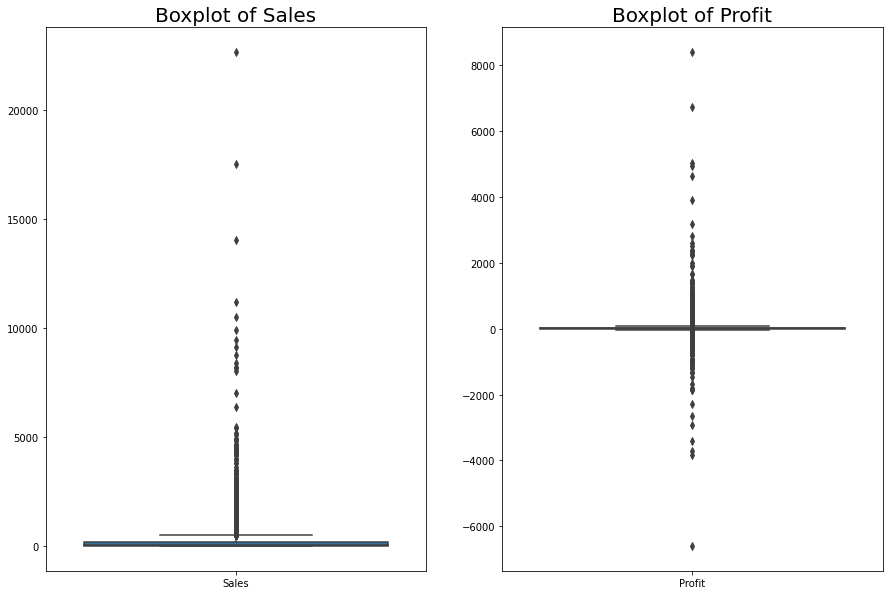

In [52]:
# Menggunakan boxplot untuk mengecek data outliers dari variabel Sales dan Profit
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,10))
sns.boxplot(data=superstore[['Sales']],ax=ax1)
ax1.set_title("Boxplot of Sales", fontsize= 20)
sns.boxplot(data=superstore[['Profit']],ax=ax2)
ax2.set_title("Boxplot of Profit", fontsize= 20)
fig.show()

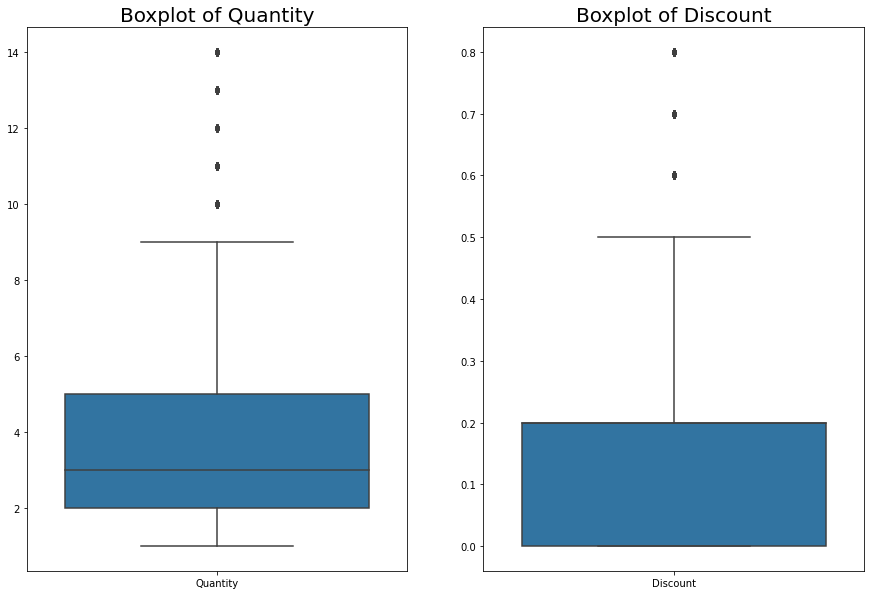

In [53]:
# Menggunakan boxplot untuk mengecek data outliers dari variabel Quantity dan Discount
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,10))
sns.boxplot(data=superstore[['Quantity']],ax=ax1)
ax1.set_title("Boxplot of Quantity", fontsize= 20)
sns.boxplot(data=superstore[['Discount']],ax=ax2)
ax2.set_title("Boxplot of Discount", fontsize= 20)
fig.show()

Penentuan suatu nilai *outlier* dapat dilakukan dengan menganalisis nilai batas bawah dan batas atas dari suatu data. Kedua nilai tersebut bergantung pada nilai Rentang Interkuartil (IQR), dimana IQR didapat dengan mengurangi nilai kuartil ketiga (Q3) dengan kuartil pertama (Q1). Nilai batas atas didapat dengan rumus Q3 + 1,5xIQR, sementara batas bawah didapat dengan rumus Q1 - 1,5xIQR. Apabila nilai suatu sampel berada di bawah batas bawah dan di atas batas atas maka termasuk *outlier*.

In [9]:
# Membuat fungsi untuk menghitung jumlah data outliers yang ada dari setiap variabel numerik
def find_outlier(data):
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)

    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    
    outlier = []
    for i in range(len(data)):
        if data[i] > batas_atas:
            outlier.append(data[i])
        if data[i] < batas_bawah:
            outlier.append(data[i])
    return len(outlier)

In [10]:
# Menunjukkan jumlah outlier dari setiap variabel numerik 
var = ['Sales', 'Quantity', 'Discount', 'Profit']

for i in var :
    list_data = superstore[i].tolist()
    print('Jumlah outlier pada variabel {}:'.format(i),find_outlier(list_data),'\n')

Jumlah outlier pada variabel Sales: 1167 

Jumlah outlier pada variabel Quantity: 170 

Jumlah outlier pada variabel Discount: 856 

Jumlah outlier pada variabel Profit: 1881 



Dari hasil pemeriksaan di atas dapat diketahui bahwa terdapat nilai *outlier* pada variabel **Sales**, **Quantity**, **Discount** dan **Profit**. Dikarenakan nilai *outlier* banyak ditemukan pada dataset dan bukan mengindikasikan nilai yang memang salah atau semua nilai numerik pada kolom tersebut masuk akal dan dalam kisaran yang diharapkan dalam kaitannya dengan studi kasus superstore sehingga *outlier* tidak perlu dihapus.

#### Identifying Data Anomaly

In [11]:
# Mengecek nilai anomali pada variabel Sales
superstore[superstore['Sales'] <= 0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [12]:
# Mengecek nilai anomali pada variabel Quantity
superstore[superstore['Quantity'] <= 0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


Pengecekan nilai anomali pada variabel **Sales** dan **Quantity** dilakukan dengan mencari nilai yang kurang atau sama dengan nol. Apabila variabel **Sales** dan **Quantity** ada yang bernilai nol atau minus maka dipastikan ada kesalahan pada data. Hasil pengecekan pada variabel **Sales** dan **Quantity** ternyata tidak ditemukan nilai anomali.

### Fixing Dataset
Memperbaiki dataset dengan cara menghapus kolom yang tidak dibutuhkan dan mengubah tipe data dengan yang sesuai.

In [13]:
# Menghapus kolom yang tidak diperlukan karena mengandung informasi yang tidak dibutuhkan
df_superstore = superstore.drop(columns=['Row ID','Country'], axis=1)

# Menampilkan kolom terbaru setelah diubah
df_superstore.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Dari dataset di atas ada dua kolom yang dihapus yaitu **Row ID** dan **Country**. Kolom **Row ID** dihapus karena hanya berisi nomor baris yang tidak diperlukan. Sedangkan kolom **Country** dihapus karena semua catatan transaksi menunjukkan negara yang sama yaitu *United States* sehingga kolom ini dirasa tidak diperlukan.

In [14]:
# Mengganti tipe data dari variabel Order Date dan Ship Date
df_superstore['Order Date'] = pd.to_datetime(df_superstore['Order Date'])
df_superstore['Ship Date'] = pd.to_datetime(df_superstore['Ship Date'])

# Menampilkan informasi terbaru dari tipe data di dalam dataset
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   City           9994 non-null   object        
 8   State          9994 non-null   object        
 9   Postal Code    9994 non-null   int64         
 10  Region         9994 non-null   object        
 11  Product ID     9994 non-null   object        
 12  Category       9994 non-null   object        
 13  Sub-Category   9994 non-null   object        
 14  Product Name   9994 non-null   object        
 15  Sales          9994 n

Pada dataset superstore, variabel **Order Date** dan **Ship Date** kita ubah tipe datanya menjadi tipe datetime supaya mudah digunakan dalam analisis data berikutnya.

## Exploratory Data Analysis

### Data Distribution
Memvisualisasikan dan mengamati distribusi data pada variabel numerik dengan menggunakan histogram.

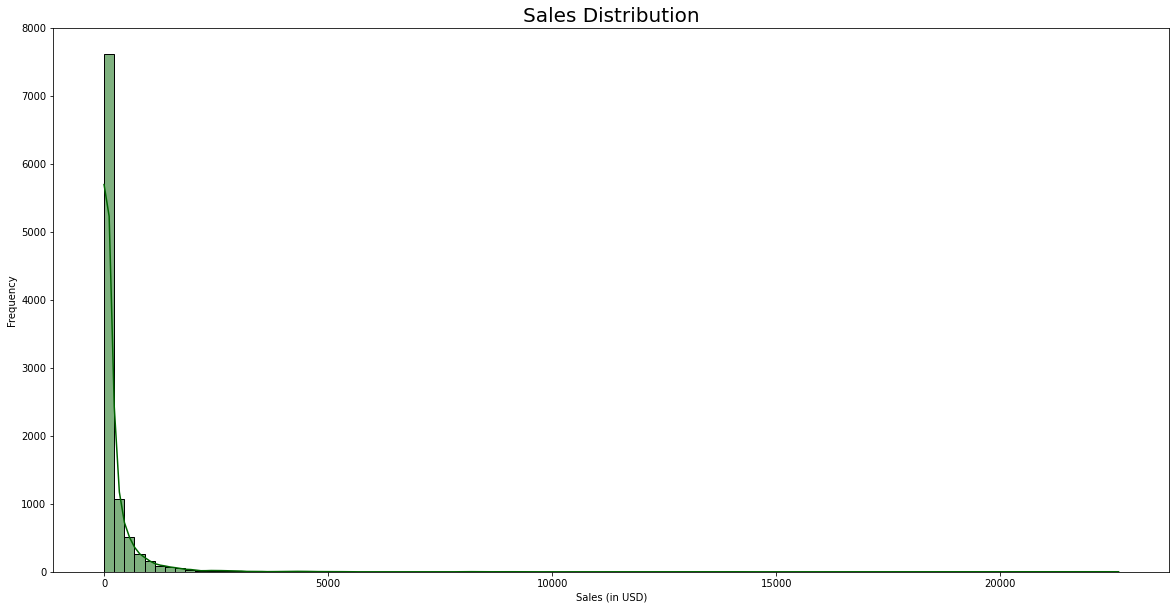

In [15]:
# Memvisualisasikan distribusi variabel dengan membuat histogram untuk Sales
plt.figure(figsize = (20,10))
sns.histplot(data=df_superstore, x='Sales', bins=100, color='darkgreen', kde=True).set_title('Sales Distribution', fontsize=20)
plt.xlabel('Sales (in USD)')
plt.ylabel('Frequency')
plt.show()

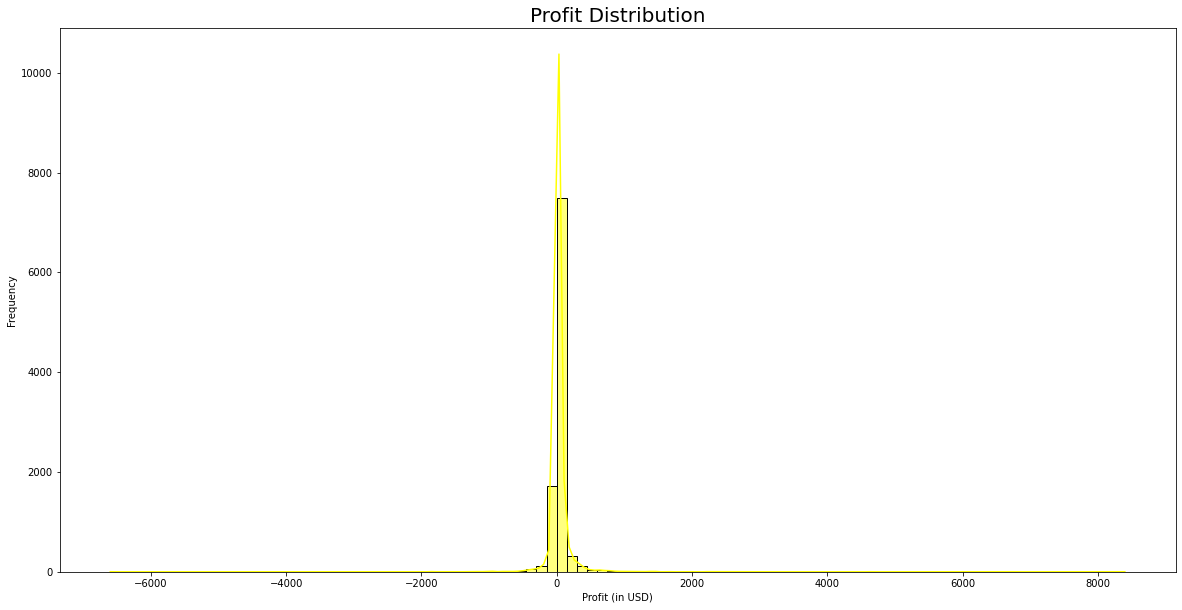

In [16]:
# Memvisualisasikan distribusi variabel dengan membuat histogram untuk Profit
plt.figure(figsize = (20,10))
sns.histplot(data=df_superstore, x='Profit', bins=100, color='yellow', kde=True).set_title('Profit Distribution', fontsize=20)
plt.xlabel('Profit (in USD)')
plt.ylabel('Frequency')
plt.show()

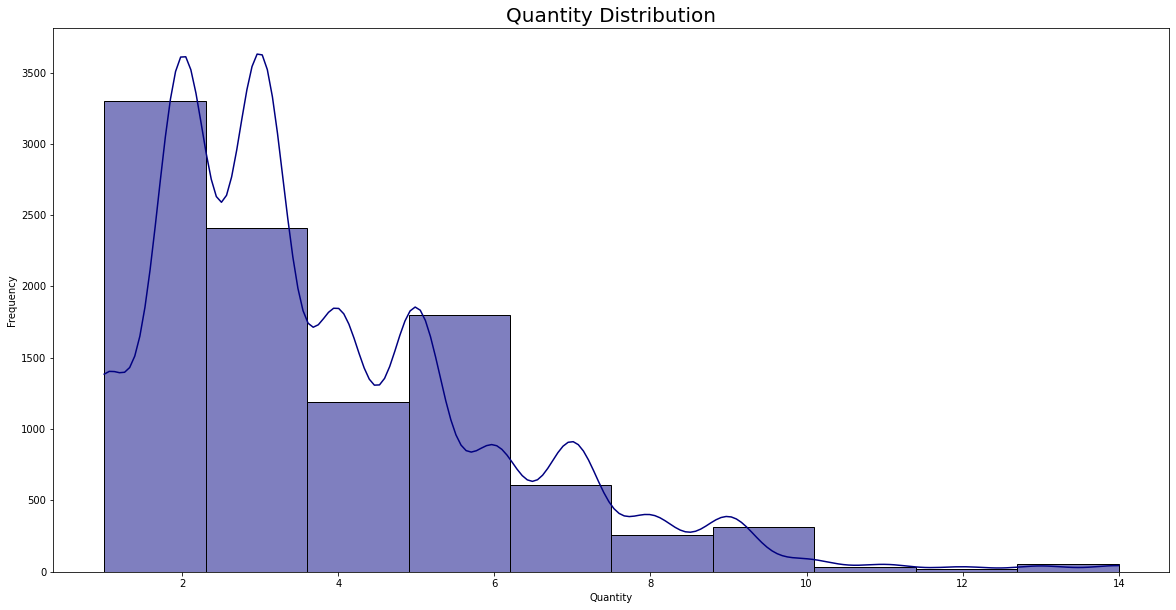

In [17]:
# Memvisualisasikan distribusi variabel dengan membuat histogram untuk Quantity
plt.figure(figsize = (20,10))
sns.histplot(data=df_superstore, x='Quantity', bins=10, color='navy', kde=True).set_title('Quantity Distribution', fontsize=20)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

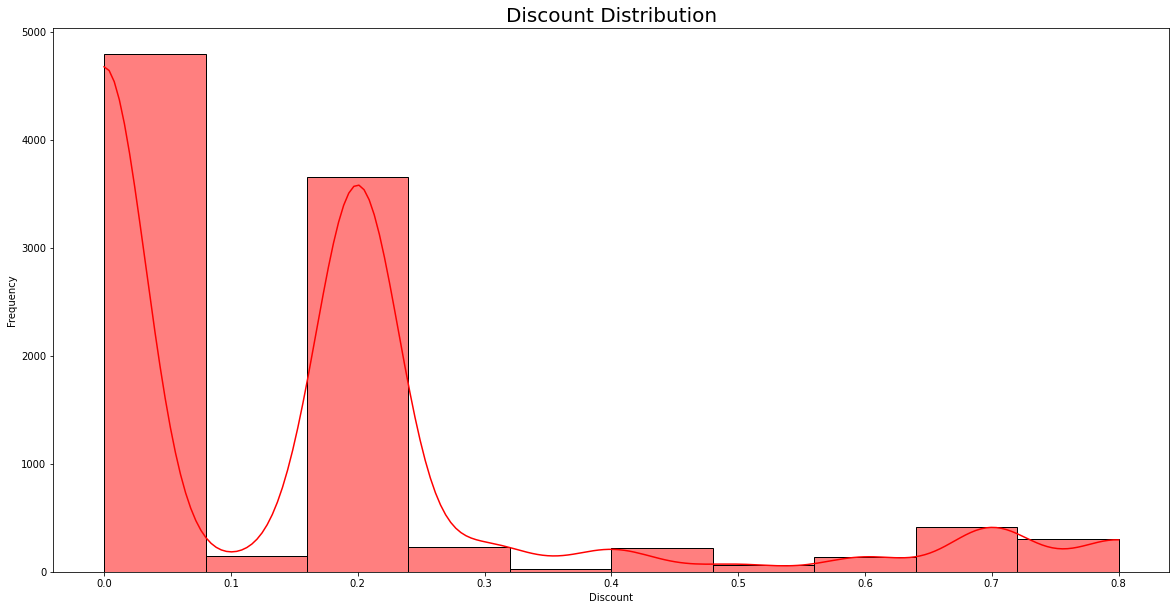

In [18]:
# Memvisualisasikan distribusi variabel dengan membuat histogram untuk jumlah pengguna total
plt.figure(figsize = (20,10))
sns.histplot(data=df_superstore, x='Discount', bins=10, color='red', kde=True).set_title('Discount Distribution', fontsize=20)
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Menggunakan uji Shapiro Wilk untuk menentukan distribusi data apakah terdistribusi normal atau tidak
for i in ['Sales','Profit','Quantity','Discount']:
  sw_statistic, sw_pvalue = shapiro(df_superstore[i])
  print('Hasil uji variabel {}:'.format(i))
  if sw_pvalue > 0.05 :
    print(f'P-Value : {sw_pvalue}. Kita berasumsi data terdistribusi normal.\n')
  else :
    print(f'P-Value : {sw_pvalue}. Kita berasumsi data tidak terdistribusi normal.\n')

Hasil uji variabel Sales:
P-Value : 0.0. Kita berasumsi data tidak terdistribusi normal.

Hasil uji variabel Profit:
P-Value : 0.0. Kita berasumsi data tidak terdistribusi normal.

Hasil uji variabel Quantity:
P-Value : 0.0. Kita berasumsi data tidak terdistribusi normal.

Hasil uji variabel Discount:
P-Value : 0.0. Kita berasumsi data tidak terdistribusi normal.



Berdasarkan analisis histogram, bentuk grafik data **Sales**, **Profit**, **Quantity** dan **Discount** tidak menunjukkan *bell shape* dan memiliki beberapa puncak, dapat dikatakan data untuk keempat variabel tersebut **tidak terdistribusi normal**. Hal ini diperkuat dengan hasil uji statistik berupa uji Shapiro Wilk dimana keempat variabel tersebut memmiliki nilai p-value yang lebih kecil dari 0.05.

### Data Cardinalities
Mengecek apakah ada kardinalitas yang tinggi dari variabel kategorik di dalam dataset yang tersedia. Kardinalitas merupakan jumlah dari kategori unik di dalam suatu variabel kategorik.

In [20]:
# Mengecek jumlah kategori yang unik dari setiap variabel kategorik
cat_var = ['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category','Sub-Category', 'Product Name']
for i in cat_var :
    print('Variabel {} memiliki data unik sebanyak {}'.format(i, df_superstore[i].nunique()),'\n')

Variabel Order ID memiliki data unik sebanyak 5009 

Variabel Ship Mode memiliki data unik sebanyak 4 

Variabel Customer ID memiliki data unik sebanyak 793 

Variabel Customer Name memiliki data unik sebanyak 793 

Variabel Segment memiliki data unik sebanyak 3 

Variabel City memiliki data unik sebanyak 531 

Variabel State memiliki data unik sebanyak 49 

Variabel Postal Code memiliki data unik sebanyak 631 

Variabel Region memiliki data unik sebanyak 4 

Variabel Product ID memiliki data unik sebanyak 1862 

Variabel Category memiliki data unik sebanyak 3 

Variabel Sub-Category memiliki data unik sebanyak 17 

Variabel Product Name memiliki data unik sebanyak 1850 



Berdasarkan hasil di atas variabel **Order ID**, **Customer ID**, **Customer Name**, **City**, **State**, **Postal Code**, **Product ID**, dan **Product Name** memiliki kardinalitas yang tinggi karena memiliki nilai unik yang banyak. Sementara variabel **Ship Mode**, **Segment**, **Region**, **Category** dan **Sub-Category** tidak memiliki kardinalitas yang tinggi karena memiliki nilai unik sedikit.

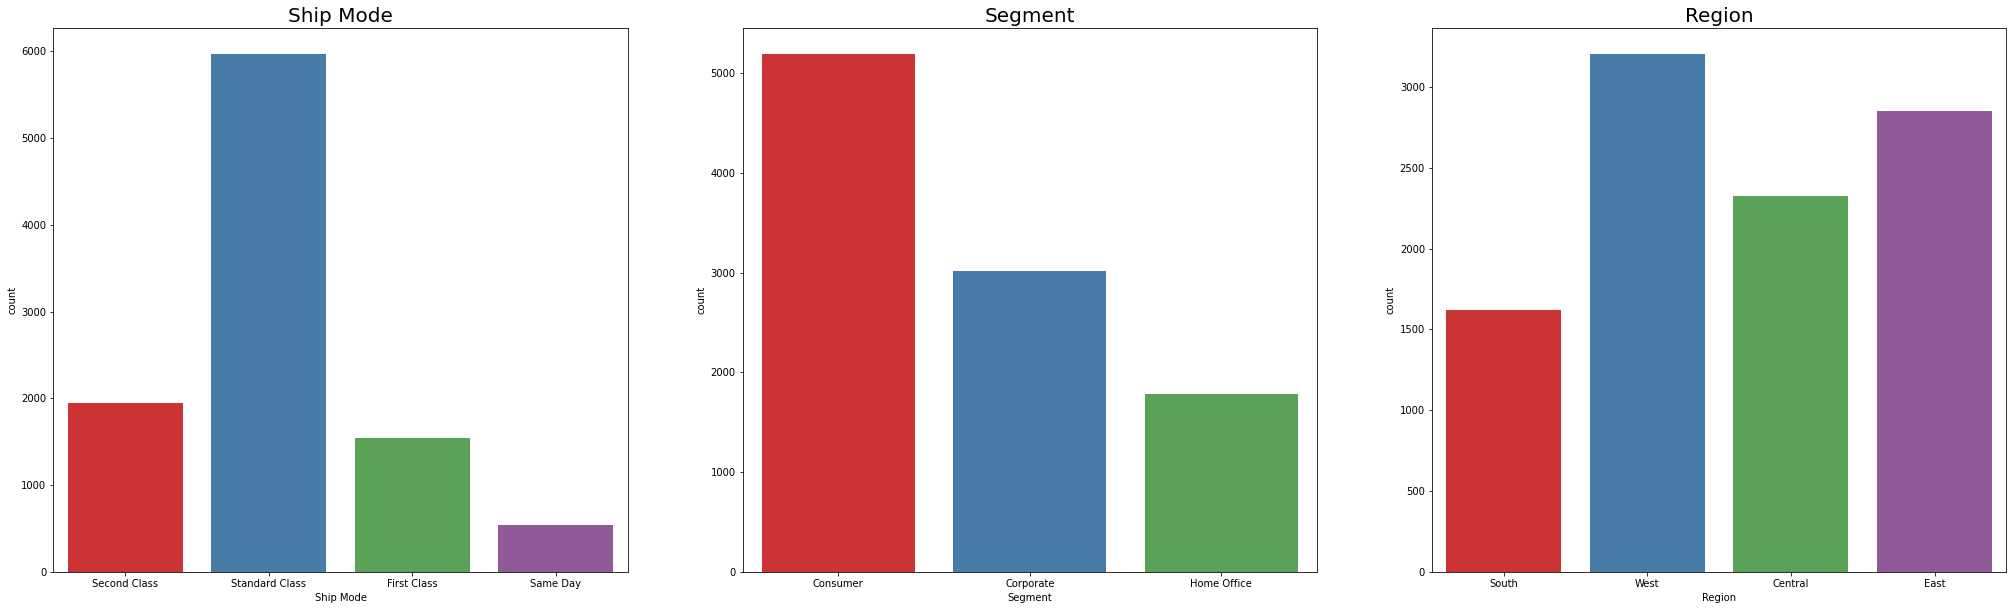

In [21]:
# Memvisualisasi frekuensi dari data unik di setiap variabel kategorik dengan kardinalitas rendah
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(35,10))
sns.countplot(data=df_superstore, x='Ship Mode', ax=ax[0], palette='Set1').set_title('Ship Mode', fontsize= 20)
sns.countplot(data=df_superstore, x='Segment', ax=ax[1], palette='Set1').set_title('Segment', fontsize= 20)
sns.countplot(data=df_superstore, x='Region', ax=ax[2], palette='Set1').set_title('Region', fontsize= 20)
fig.show()

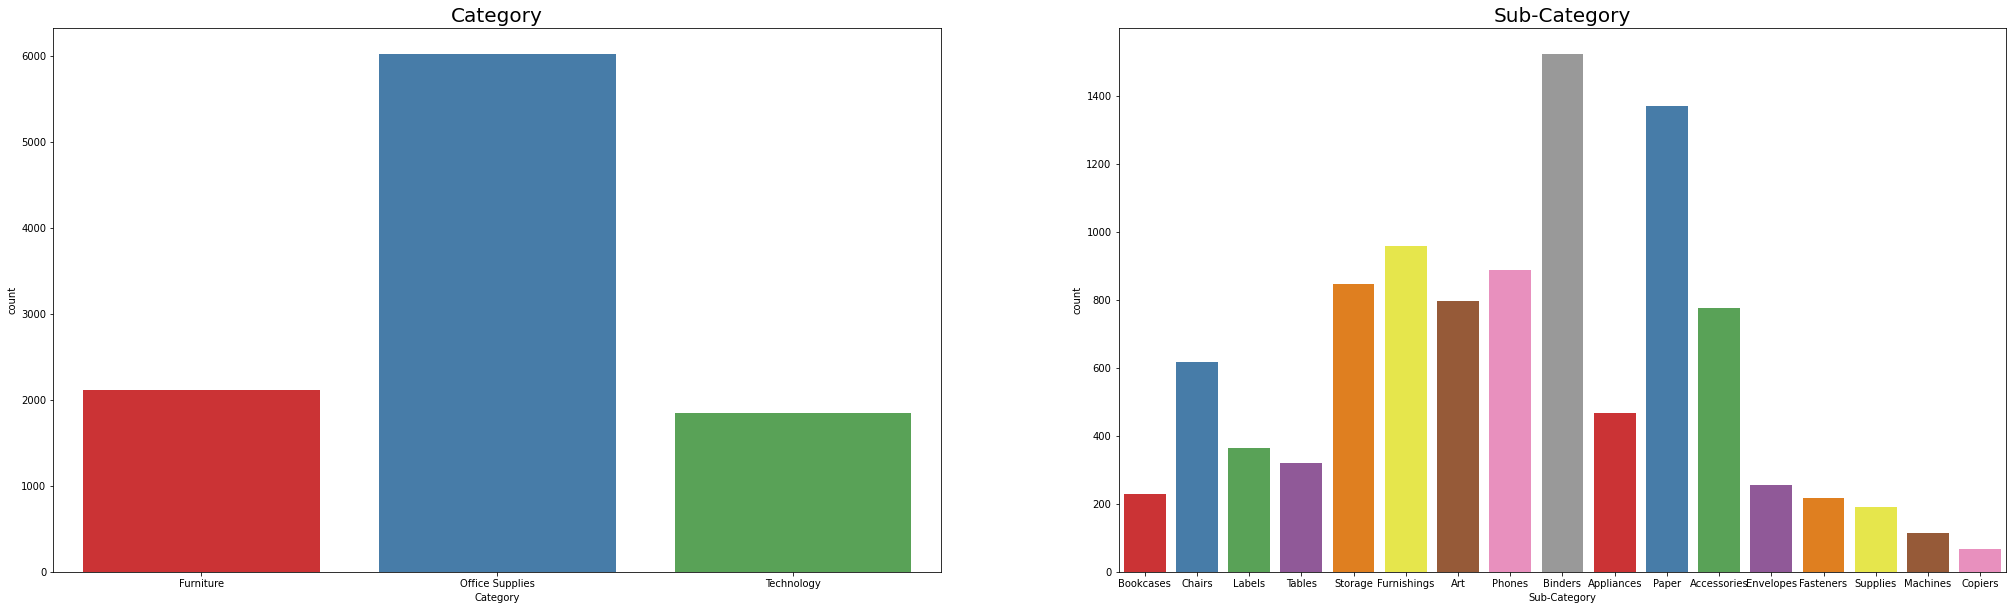

In [22]:
# Memvisualisasi frekuensi dari data unik di setiap variabel kategorik dengan kardinalitas rendah
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35,10))
sns.countplot(data=df_superstore, x='Category', ax=ax[0], palette='Set1').set_title('Category', fontsize= 20)
sns.countplot(data=df_superstore, x='Sub-Category', ax=ax[1], palette='Set1').set_title('Sub-Category', fontsize= 20)
fig.show()

### Data Correlation
Memvisualisasikan dan mengamati korelasi antara variabel numerik dalam dataset menggunakan *heatmap*.

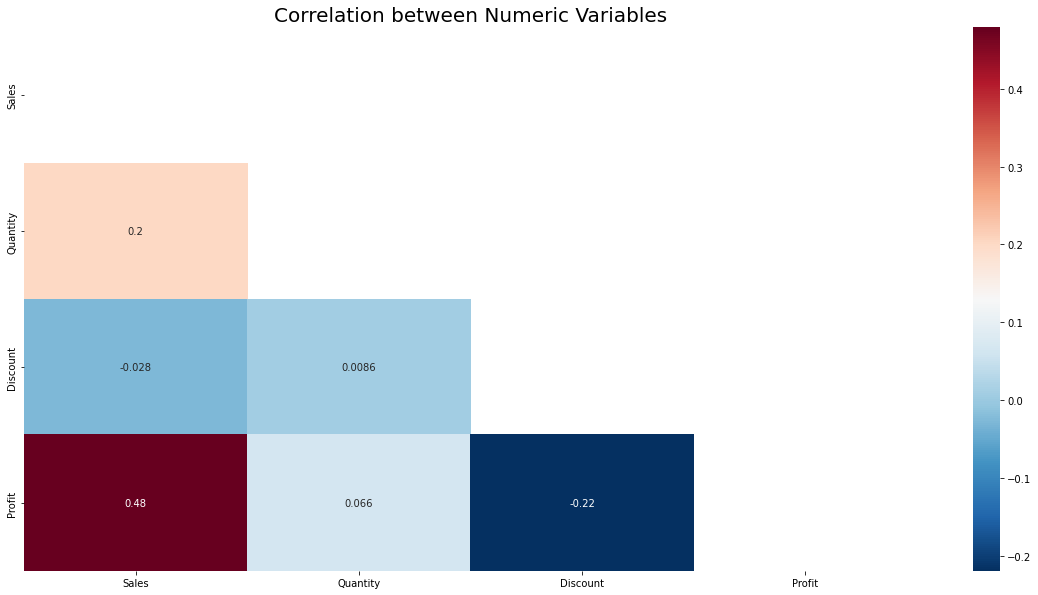

In [23]:
# Memvisualisasi korelasi antara semua variabel numerik menggunakan heatmap
num_var = ['Sales','Quantity','Discount','Profit']
plt.figure(figsize=(20,10))
mask = np.zeros_like(df_superstore[num_var].corr(method='spearman'), dtype=np.bool) #Penggunaan metode spearman karena data pada variabel tersebut tidak terdistribusi normal
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_superstore[num_var].corr(),cmap='RdBu_r',mask=mask, annot=True)
plt.title('Correlation between Numeric Variables', fontdict = {'fontsize' : 20})
plt.show()

Nilai yang kita dapatkan dari heatmap ini menunjukkan nilai korelasi antara variabel. Nilai ini dapat berupa korelasi positif dan juga negatif. Semakin mendekati 1 maka korelasi positif semakin kuat dan semakin mendekati -1 maka korelasi negatif semakin kuat.

Dari *heatmap* di atas kita dapat menyimpulkan bahwa ada beberapa korelasi antara variabel yang ada, seperti:
- Variabel Sales dan Profit memiliki korelasi positif sedang dengan nilai 0.48. Hal ini menunjukkan ketika Sales mengalami peningkatan, Profit juga akan meningkat.
- Variabel Sales dan Discount memiliki korelasi negatif yang sangat lemah dengan nilai -0.028 atau dapat dikatakan hampir tidak berkorelasi.
- Variabel Sales dan Quantity memiliki korelasi positif yang lemah dengan nilai 0.2.
- Variabel Profit dan Discount memiliki korelasi negatif yang lemah dengan nilai -0.22.
- Variabel Profit dan Quantity memiliki korelasi positif yang sangat lemah dengan nilai 0.066 atau dapat dikatakan hampir tidak berkorelasi.
- Variabel Quantity dan Discount memiliki korelasi positif yang sangat lemah dengan nilai 0.0086 atau dapat dikatakan hampir tidak berkorelasi.

Dari analisis di atas dapat disimpulkan bahwa keempat variabel tersebut tidak memiliki korelasi kuat atau bernilai tinggi sehingga dapat digunakan untuk membuat model regresi linear karena tidak menimbulkan masalah multikolinearitas.

### Statistic Descriptive

In [24]:
# Menunjukkan data statistik deskriptif dari variabel numerik
df_superstore[['Sales', 'Quantity', 'Discount', 'Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [25]:
# Menunjukkan data statistik deskriptif berupa jumlah total beberapa variabel numerik
df_superstore[['Sales', 'Quantity', 'Discount', 'Profit']].sum()

Sales       2.297201e+06
Quantity    3.787300e+04
Discount    1.561090e+03
Profit      2.863970e+05
dtype: float64

Dari analisis data numerik transaksi penjualan di Superstore dari tahun 2014-2017 di atas, kita dapat mengamati beberapa hal yaitu:
- Total penjualan selama empat tahun yaitu sebesar 2297201 USD dengan rata-rata penjualan sebesar 229.85 USD per transaksi. Nilai penjualan tertinggi sebesar 22638.48 USD dan nilai penjualan terendah sebesar 0.444 USD.
- Jumlah total produk yang terjual adalah 37873 dan rata-rata produk yang terjual sebesar 4 per transaksi. Jumlah produk tertinggi dalam penjualan yaitu 14 dan terendah sebesar 1.
- Diskon rata-rata adalah 15.6% untuk setiap transaksi. Nilai diskon berkisar dari 0% (tidak ada diskon) hingga 80%.
- Total keuntungan yang sudah dihasilkan superstore adalah 286397 USD dan rata-rata keuntungan sebesar 28.65 USD per transaksi. Nilai keuntungan tertinggi yang pernah diperoleh mencapai 8399.976 USD. Namun superstore juga pernah mengalami kerugian sebesar -6599.978 USD pada suatu transaksi. Dari hal ini dapat diketahui bahwa superstore tidak hanya mendapatkan keuntungan saja namun juga pernah mengalami kerugian dalam menjual produknya.

In [26]:
# Mengecek jumlah transaksi yang untung, rugi atau tidak untung datau rugi dari keseluruhan transaksi
# Mengecek jumlah transaksi yang untung
profit = df_superstore[df_superstore['Profit'] > 0]
profit_percentage = len(profit)/len(df_superstore)*100
print('Transaksi untung : {} transaksi atau {:.2f}%'.format(len(profit), profit_percentage))

# Mengecek jumlah transaksi yang rugi
loss = df_superstore[df_superstore['Profit'] < 0]
loss_percentage = len(loss)/len(df_superstore)*100
print('Transaksi rugi   : {} transaksi atau {:.2f}%'.format(len(loss), loss_percentage))

# Mengecek jumlah transaksi yang tidak untung atau rugi
zero = df_superstore[df_superstore['Profit'] == 0]
zero_percentage = len(zero)/len(df_superstore)*100
print('Transaksi yang tidak untung atau rugi : {} transaksi atau {:.2f}%'.format(len(zero), zero_percentage))

Transaksi untung : 8058 transaksi atau 80.63%
Transaksi rugi   : 1871 transaksi atau 18.72%
Transaksi yang tidak untung atau rugi : 65 transaksi atau 0.65%


Setelah dicek secara lebih mendalam terhadap transaksi yang dilakukan, ternyata terdapat 8058 transaksi yang menguntungkan atau sebesar 80.63% dari keseluruhan transaksi. Untuk transaksi yang merugikan sebanyak 1871 transaksi atau 18.72% dari keseluruhan transaksi. Sementara itu, terdapat transaksi yang tidak untung maupun rugi sebanyak 65 transaksi atau 0.65% dari keseluruhan transaksi.

In [27]:
# Menunjukkan data statistik deskriptif dari variabel kategorik
df_superstore.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,915,2001,3203,19,6026,1523,48


Dari analisis variabel kategorik dalam transaksi penjualan di Superstore dari tahun 2014-2017 di atas, kita dapat mengamati beberapa hal yaitu:
- Terdapat 4 jenis metode pengiriman dengan jenis Standard Class paling banyak dipilih sebesar 5968 atau 59.72% dari keseluruhan transaksi.
- Untuk segmen pelanggan terdapat 3 kategori, dimana kategori *Consumer* menjadi yang paling banyak yaitu sebesar 5191 atau 51.94% dari keseluruhan transaksi.
- Kota New York City (915 transaksi), Negara Bagian California (2001 transaksi) dan wilayah bagian barat (3203 transaksi) menjadi daerah tertinggi dalam transaksi penjualan.
- Terdapat 3 kategori dan 17 sub-kategori dari produk. Kategori *office suplies* (6026 transaksi) dan sub-kategori *binders* (1523 transaksi) menjadi yang paling banyak dibeli.

## Machine Learning
Dalam transaksi penjualan yang dilakukan oleh superstore, ada yang menghasilkan keuntungan dan kerugian. Keuntungan dan kerugian ini dapat dipengaruhi oleh faktor seperti produk, kategori, wilayah dan segmen pelanggan. Oleh karena itu, perlu dibuat model yang bisa memprediksi profit berdasarkan faktor-faktor tersebut sehingga dapat dijadikan salah satu acuan dalam mempersiapkan strategi bisnis yang tepat untuk meningkatkan profit dan mengurangi kerugian.


Model *multiple linear regression* digunakan untuk memprediksi atau
menganalisis variabel dependen berdasarkan lebih dari satu variabel
independen menggunakan regresi linear. Dalam hal ini, model tersebut akan digunakan untuk memprediksi profit berdasarkan beberapa *feature*/variabel independen pada data transaksi penjualan. Variabel independen yang digunakan untuk membangun model yaitu *Ship Mode*, *Segment*, *Region*, *Category*, *Sales*, *Quantity*, dan *Discount*.

### Preprocessing
Pada tahap ini akan dilakukan proses ***encoding*** untuk variabel kategorik (*Ship Mode*, *Segment*, *Region*, *Category*) dan proses ***scaling*** untuk variabel numerik (*Sales*, *Quantity*, dan *Discount*). ***Encoding*** merupakan suatu metode yang dapat diterapkan untuk merepresentasikan variabel kategorik dalam machine learning. Variabel kategorik akan di-*encoding* menggunakan metode ***One Hot Encoding***. Dalam *One Hot Encoding*, kita memecah suatu variabel kategorik menjadi beberapa variabel yang nilainya satu atau nol atau disebut juga *dummy variable*. Penggunaan ***drop = 'first'*** perlu dilakukan karena kita menggunakan model regresi linear. Khusus linear model, maksimal banyaknya *dummy variable* yang perlu dibuat adalah banyaknya kategori dikurangi satu. Hal ini dilakukan untuk menghindari masalah multikolinearitas. Sementara, ***Scaling*** adalah metode untuk melakukan transformasi terhadap data numerik agar antar variabel memiliki skala yang sama. Variabel numerik akan di-*scaling* dengan metode ***Robust Scaler***. ***Robust Scaler*** digunakan karena tidak sensitif terhadap *outlier*.

In [28]:
# Melakukan proses encoding variabel kategorik dengan menggunakan One Hot Encoding dan scaling variabel numerik dengan menggunakan Robust Scaler
cat_features = ['Ship Mode','Segment','Region', 'Category']
num_features = ['Sales', 'Quantity', 'Discount']
# Menggabungkan proses preprocessing One Hot Encoding dan Robust Scaler dengan menggunakan ColumnTransformer()
transformer = ColumnTransformer([
                                 ('one hot encoder', OneHotEncoder(drop = 'first'), cat_features),
                                 ('robust scaler', RobustScaler(), num_features)
                                ], remainder = 'passthrough')

#### Data splitting

In [29]:
# Membuat duplikat dataset yang akan digunakan untuk model
df = df_superstore.copy()

# Membuat dataset untuk variabel independen (X) dan variabel dependen/target(y)
X = df[cat_features + num_features]
y = df['Profit']

# Membagi dataset menjadi 4 bagian yaitu X_train, X_test, y_train dan y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

#### Data transform

In [30]:
# Melakukan proses transformasi data (menerapkan proses encoding dan scaling pada data) 
X_train_preprocessed = transformer.fit_transform(X_train) # Proses fitting dan transform untuk X_train. Proses .fit hanya diterapkan untuk training set saja
X_test_preprocessed = transformer.transform(X_test) # Proses .transform pada X_test

In [31]:
# Mengubah data hasil preprocessing ke bentuk dataframe
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)

In [32]:
# Memberi nama kolom pada dataset hasil preprocessing
features = list(transformer.transformers_[0][1].get_feature_names()) + num_features
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features

# Menampilkan dataset hasil preprocessing
X_train_preprocessed

,x0_Same Day,x0_Second Class,x0_Standard Class,x1_Corporate,x1_Home Office,x2_East,x2_South,x2_West,x3_Office Supplies,x3_Technology,Sales,Quantity,Discount
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.341896,1.000000,-1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.372672,1.000000,-1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-0.205424,1.000000,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.111665,0.666667,-1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.124348,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7990,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.237879,0.666667,0.0
7991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.144773,2.000000,-1.0
7992,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.211921,0.666667,-1.0
7993,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.031284,1.333333,-1.0


### Model
Membangun arsitektural model multiple linear regression dengan Deep Neural Network (DNN).

In [33]:
# Membuat Model Multiple Linear Regression dengan Deep Neural Network (DNN)
model = Sequential()
model.add(Dense(256, kernel_regularizer=regularizers.l2(0.0001), activation='relu', input_shape=(X_train_preprocessed.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(128, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

In [34]:
# Mendapat rangkuman dari proses learning model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3584      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [35]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0005)

# Melakukan compile model
model.compile(optimizer = adam, loss = 'mse', metrics = ['mae'])

In [36]:
# # Membuat callback EarlyStoping
# early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [37]:
# Melakukan proses fitting model
history = model.fit(
    X_train_preprocessed,
    y_train,
    validation_split = 0.25, 
    batch_size = 50,
    epochs = 300,
    verbose = 1
    # callbacks = [early_stop]
)

Epoch 1/300
120/120 [==============================] - 4s 18ms/step - loss: 39405.3984 - mae: 56.2296 - val_loss: 62074.3828 - val_mae: 57.3660
Epoch 2/300
120/120 [==============================] - 1s 9ms/step - loss: 33657.0312 - mae: 49.5064 - val_loss: 47585.9453 - val_mae: 45.3349
Epoch 3/300
120/120 [==============================] - 1s 9ms/step - loss: 27982.0449 - mae: 44.9652 - val_loss: 41788.2188 - val_mae: 47.0217
Epoch 4/300
120/120 [==============================] - 1s 8ms/step - loss: 24653.2676 - mae: 44.0426 - val_loss: 35175.3984 - val_mae: 42.9283
Epoch 5/300
120/120 [==============================] - 1s 9ms/step - loss: 24632.9883 - mae: 45.0465 - val_loss: 33761.3008 - val_mae: 43.3823
Epoch 6/300
120/120 [==============================] - 1s 12ms/step - loss: 22569.6152 - mae: 42.3339 - val_loss: 33661.2500 - val_mae: 42.6308
Epoch 7/300
120/120 [==============================] - 1s 8ms/step - loss: 23650.0234 - mae: 43.0072 - val_loss: 33262.9844 - val_mae: 41.43

### Model Evaluation

In [38]:
# Evaluasi model pada train dataset
model.evaluate(X_train_preprocessed, y_train, verbose = 1)

250/250 [==============================] - 0s 2ms/step - loss: 5737.6567 - mae: 24.0838


[5737.65673828125, 24.083755493164062]

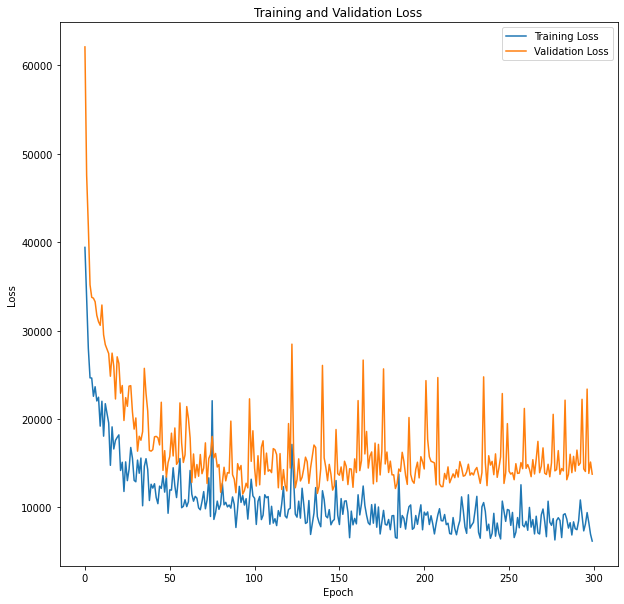

In [39]:
# Membuat grafik nilai loss dari proses training dan validation
plt.figure(figsize = (10,10))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc = 'upper right')
plt.show()

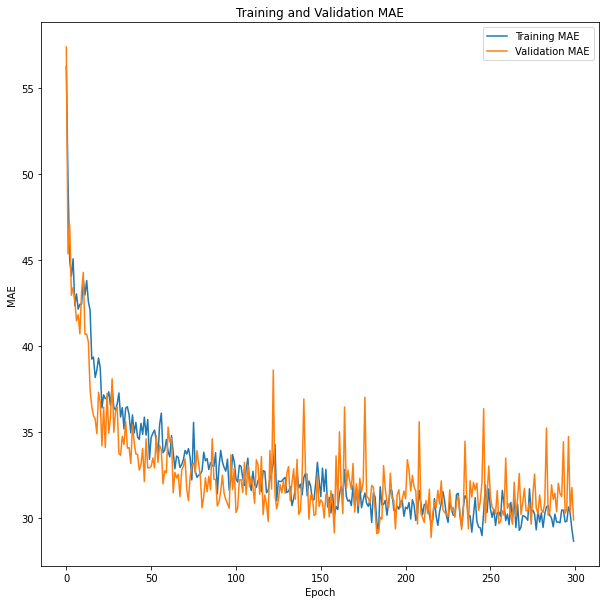

In [40]:
# Membuat grafik nilai mean absolute error dari proses training dan validation
plt.figure(figsize = (10,10))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Accuracy Plot')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.title('Training and Validation MAE')
plt.legend(loc="upper right")
plt.show()

In [41]:
# Evaluasi model pada test dataset
model.evaluate(X_test_preprocessed, y_test, verbose = 1)

63/63 [==============================] - 0s 1ms/step - loss: 13567.0596 - mae: 27.9768


[13567.0595703125, 27.976787567138672]

In [42]:
# Melakukan prediksi menggunakan dataset X_test_preprocessed
y_pred = np.squeeze(model.predict(X_test_preprocessed))

In [43]:
# Membuat fungsi untuk menghitung Regression metrics yang digunakan dalam mengevaluasi model
def regression_results(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred) 
    mse = mean_squared_error(y_true, y_pred) 
    mad = median_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
   
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAE: ', round(mae,4))
    print('Median Absolute Error: ', round(mad,4))
    print('R-squared: ', round(r2,4))
    print('\n')

In [44]:
# Melakukan evaluasi model berdasarkan test set dengan metrics yang sudah ditentukan (mengecek performa akhir dari model)
regression_results(y_test, y_pred)

MSE:  13566.8157
RMSE:  116.4767
MAE:  27.9768
Median Absolute Error:  6.5518
R-squared:  0.8456




Performa akhir model menunjukkan nilai R-squared 0.8456 yang menandakan bahwa variasi nilai y (response variable/dependent variable) yang dapat dijelaskan oleh model hanya 84.56%.

Error Analysis

In [45]:
# Tabel perbandingan nilai aktual dan prediksi beserta nilai error
df_results = pd.DataFrame({
    'Actual': y_test.tolist(),
    'Prediction': y_pred.tolist()
})

df_results['Error'] = df_results['Prediction'] - df_results['Actual']
df_results

,Actual,Prediction,Error
0,54.3966,42.907768,-11.488832
1,75.6548,41.432003,-34.222797
2,-2.0622,-12.556470,-10.494270
3,46.9764,55.768806,8.792406
4,-9.7050,-19.271318,-9.566318
...,...,...,...
1994,21.8376,41.320515,19.482915
1995,-5.6007,-12.417118,-6.816418
1996,-1.8904,-16.257105,-14.366705
1997,12.5990,35.668098,23.069098


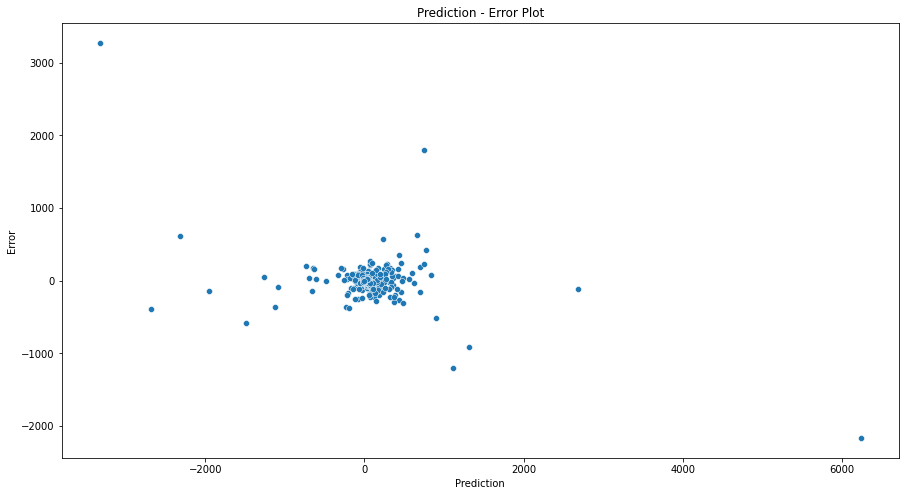

In [46]:
# Membuat scatterplot nilai prediksi dengan nilai error(selisih nilai prediksi dengan nilai aktual)
plt.figure(figsize=(15,8))
sns.scatterplot(y_pred,df_results['Error'])
plt.xlabel('Prediction')
plt.ylabel('Error')
plt.title('Prediction - Error Plot')
plt.show()

Grafik di atas menunjukkan persebaran nilai prediksi dengan nilai error (selisih nilai prediksi dengan nilai aktual) pada test model. Grafik menunjukkan nilai error sudah berkisar di nilai nol yang menunjukkan hasil prediksi sudah cukup baik, namun ada beberapa amatan dimana data point yang hasil prediksinya meleset jauh (ditunjukkan oleh data point yang nilai error-nya jauh dari nol).

In [47]:
# Menunjukkan statistik deskriptif dari variabel error
df_results[['Error']].describe()

,Error
count,1999.000000
mean,-0.310875
std,116.505404
min,-2166.138109
25%,-8.840421
50%,0.473758
75%,5.354902
max,3275.188205


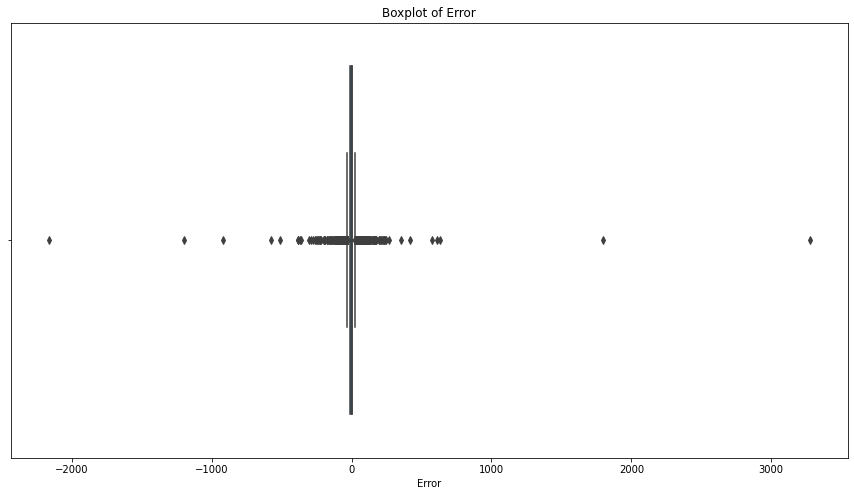

In [48]:
# Menunjukkan boxplot nilai error untuk melihat adanya outlier
plt.figure(figsize=(15, 8))
sns.boxplot(df_results['Error'])
plt.title('Boxplot of Error')
plt.show()

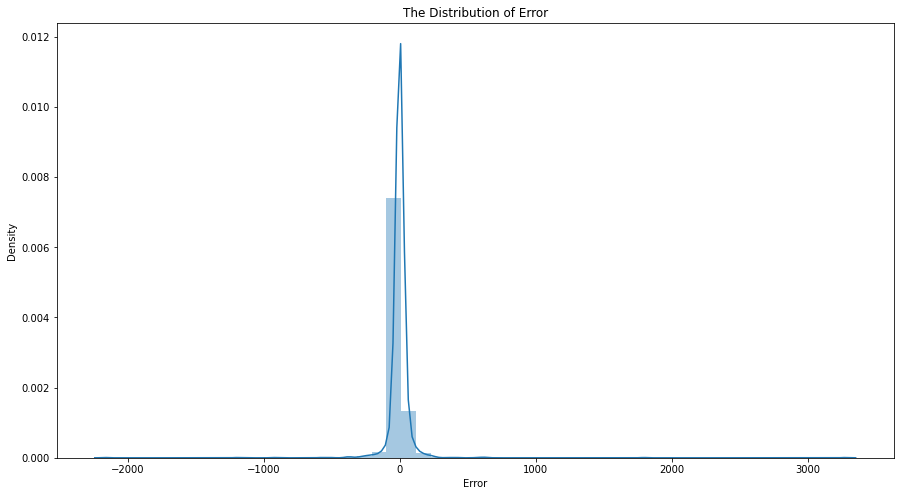

In [49]:
# Membuat histogram untuk menunjukkan distribusi nilai error
plt.figure(figsize=(15, 8))
sns.distplot(df_results['Error'])
plt.title("The Distribution of Error")
plt.show()

Berdasarkan analisis beberapa grafik di atas, kita dapat melihat bahwa masih banyak *outlier* yang ada dalam nilai error sehingga kita menggunakan MAE (Mean Absolute Error) sebagai standar error dibandingkan dengan RMSE dan MSE karena MAE kurang sensitif terhadap *outlier* sementara RMSE dan MSE sangat sensitif terhadap *outlier*.

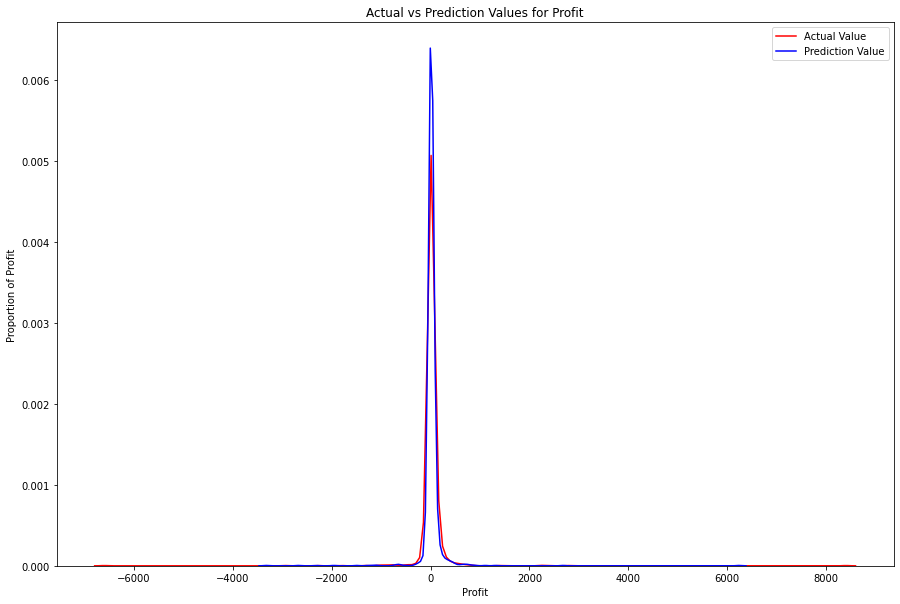

In [50]:
# Distribution plot untuk melihat kemampuan model dalam menggeneralisasi data tes
plt.figure(figsize=(15, 10))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Prediction Value" , ax=ax1)

plt.title('Actual vs Prediction Values for Profit')
plt.xlabel('Profit')
plt.ylabel('Proportion of Profit')
plt.legend()
plt.show()
plt.close()

In [51]:
# Menyimpan model
model.save('Linear_model.h5')

Model Analysis
- Model yang digunakan untuk memprediksi profit adalah **Multiple Linear Regression DNN** memiliki nilai R-squared yang dihasilkan sebesar 0.8456 menandakan bahwa variasi nilai Y (Response Variable) yang dapat dijelaskan oleh model hanya 84.56%. Dapat kita simpulkan bahwa melalui model ini kita dapat memprediksi profit sistem berdasarkan *feature Ship Mode, Segment, Region, Category, Sales, Quantity dan Discount* dengan akurasi sebesar 84.56%.
-  MAE (Mean Absolute Error) digunakan sebagai standar error dibandingkan dengan RMSE dan MSE karena MAE kurang sensitif terhadap *outlier*. MAE yang dihasilkan oleh model ini adalah 27.98 yang artinya dalam memprediksi profit, model memiliki nilai error sebesar 27.98.
- Model ini dibangun dari beberapa variabel numerik dan kategorik. Variabel kategorik yang digunakan merupakan variabel dengan kardinalitas yang rendah yaitu *Ship Mode*, *Segment*, *Region* dan *Category* sehingga model ini tdak terlalu kompleks. Untuk selanjutnya diharapkan model dapat buat dengan menggunakan variabel kategorik dengan kardinalitas tinggi sehingga model dibangun berdasarkan variabel yang lebih spesifik.
- Untuk meningkatkan performa model dibutuhkan data yang lebih banyak.